<a href="https://www.kaggle.com/code/yorkyong/santander-churn-eda-logregression-baseline?scriptVersionId=160658548" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>1 |</span></b> <b>INTRODUCTION</b></div>

### <b><span style='color:#FFCE30'> 1.1 |</span> Purpose</b>
- The purpose of this notebook is to test and apply a simple baseline ML technique on the merged dataset to see if it is working and can generate reasonable result for evaluation of the prediction.
- We will attempt to predict if the customer will churn or not based on the dataset and splitting the data into two sets (train_test_split)

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>2 |</span></b> <b>LOAD LIBRARY & DATA</b></div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Set the display options to show all columns without truncation
pd.set_option('display.max_columns', None)

In [2]:
#Load the data
df = pd.read_csv("/kaggle/input/santander-churn-dataset/Santander_Churn_train.csv")

In [3]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0,train_13,1,16.3699,1.5934,16.7395,7.3330,12.1450,5.9004,4.8222,20.9729,1.1064,8.6978,2.3287,-11.3409,13.7999,2.7925,6.3182,14.7313,7.2594,-2.4759,14.3984,9.1793,16.8467,19.4258,1.6565,2.5107,7.1272,13.6444,-12.8761,-1.0136,5.1773,7.3507,-16.0042,6.4460,-3.3238,14.3372,10.9481,6.7386,-0.5110,4.4335,7.8621,0.9851,-2.7683,20.3226,11.6988,11.4962,6.9105,3.1540,16.8121,-16.4423,11.3112,10.3608,13.3774,28.1402,-7.2237,7.7886,4.1192,12.1580,16.3189,4.9590,8.5248,8.4103,7.4576,-21.2631,2.0528,-0.9234,7.0410,0.0356,6.2113,16.2506,5.0265,-5.2830,43.2469,0.7891,-4.6379,2.0563,34.3104,11.6237,18.8226,23.6974,5.1943,14.7594,-4.2354,12.1677,-8.1746,-5.0063,13.5283,20.7959,1.8496,8.2186,7.2955,0.3097,5.1511,7.0012,15.9338,10.1819,15.0883,0.4787,26.9915,6.6598,2.6128,-2.3490,3.0553,7.9854,23.1168,1.2800,10.3728,4.2077,6.9854,3.2922,14.1718,19.9806,7.3345,6.6171,3.4385,10.8491,2.8266,-3.6481,0.6314,13.8302,-2.5018,-2.3101,11.2664,11.7174,-0.4719,7.8367,3.9109,12.4349,11.9001,0.1655,-5.0549,17.7638,11.7535,0.4436,6.0714,6.7134,-1.1220,12.0274,32.1259,6.3593,-1.5168,1.4873,0.8073,13.7223,17.1869,11.3074,10.1656,0.8520,9.4301,-6.1274,3.8642,1.5096,17.0617,5.0138,5.3431,18.8845,7.4016,-1.7007,13.8201,-3.1054,18.1658,6.6379,32.5287,5.8451,4.9591,11.7805,-7.0936,11.8863,3.2597,-4.3478,7.5711,5.6656,3.5750,-8.6583,20.3131,-2.2723,15.7383,8.1730,-12.4963,15.1929,3.9751,8.5618,2.4566,9.3694,0.6942,11.9694,11.8982,0.6129,10.8123,-1.0803,11.9586,-0.5899,7.4002,7.4031,4.3989,4.0978,17.3638,-1.3022,9.6846,9.0419,15.6064,-10.8529
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0,train_29,1,5.3301,-2.6064,13.1913,3.1193,6.6483,-6.5659,5.9064,15.2341,1.2915,9.1168,6.8278,1.3898,14.0957,12.3335,9.0616,14.8726,11.3542,5.2004,1.6610,24.3097,3.1983,13.0446,4.3067,2.1315,7.9501,13.9981,-12.6789,-0.7712,5.9889,2.1959,-16.2435,10.9816,-3.2509,7.8550,11.2951,14.3999,2.3497,6.4171,17.5473,-2.1249,-15.7092,7.6038,10.6423,11.2456,3.5497,14.5023,11.2144,-5.5329,8.1215,9.8182,13.7371,15.5106,-6.8440,5.7645,8.2102,6.0625,23.2816,7.1364,-2.7571,10.3222,8.8469,-7.0555,-1.5834,1.6658,6.9878,0.1353,4.3773,4.7981,5.0202,-5.1929,39.3510,0.5454,-0.0685,29.0933,23.0940,23.6232,7.0666,20.9167,3.1704,11.8957,-9.1243,15.2648,11.2055,3.6793,-6.4194,15.3155,6.8857,7.6681,11.095

In [4]:
# Drop 'ID_code' and 'Exited' and 'id' columns.
df = df.drop(['ID_code', 'Exited', 'id'], axis=1)

In [5]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,1,16.3699,1.5934,16.7395,7.3330,12.1450,5.9004,4.8222,20.9729,1.1064,8.6978,2.3287,-11.3409,13.7999,2.7925,6.3182,14.7313,7.2594,-2.4759,14.3984,9.1793,16.8467,19.4258,1.6565,2.5107,7.1272,13.6444,-12.8761,-1.0136,5.1773,7.3507,-16.0042,6.4460,-3.3238,14.3372,10.9481,6.7386,-0.5110,4.4335,7.8621,0.9851,-2.7683,20.3226,11.6988,11.4962,6.9105,3.1540,16.8121,-16.4423,11.3112,10.3608,13.3774,28.1402,-7.2237,7.7886,4.1192,12.1580,16.3189,4.9590,8.5248,8.4103,7.4576,-21.2631,2.0528,-0.9234,7.0410,0.0356,6.2113,16.2506,5.0265,-5.2830,43.2469,0.7891,-4.6379,2.0563,34.3104,11.6237,18.8226,23.6974,5.1943,14.7594,-4.2354,12.1677,-8.1746,-5.0063,13.5283,20.7959,1.8496,8.2186,7.2955,0.3097,5.1511,7.0012,15.9338,10.1819,15.0883,0.4787,26.9915,6.6598,2.6128,-2.3490,3.0553,7.9854,23.1168,1.2800,10.3728,4.2077,6.9854,3.2922,14.1718,19.9806,7.3345,6.6171,3.4385,10.8491,2.8266,-3.6481,0.6314,13.8302,-2.5018,-2.3101,11.2664,11.7174,-0.4719,7.8367,3.9109,12.4349,11.9001,0.1655,-5.0549,17.7638,11.7535,0.4436,6.0714,6.7134,-1.1220,12.0274,32.1259,6.3593,-1.5168,1.4873,0.8073,13.7223,17.1869,11.3074,10.1656,0.8520,9.4301,-6.1274,3.8642,1.5096,17.0617,5.0138,5.3431,18.8845,7.4016,-1.7007,13.8201,-3.1054,18.1658,6.6379,32.5287,5.8451,4.9591,11.7805,-7.0936,11.8863,3.2597,-4.3478,7.5711,5.6656,3.5750,-8.6583,20.3131,-2.2723,15.7383,8.1730,-12.4963,15.1929,3.9751,8.5618,2.4566,9.3694,0.6942,11.9694,11.8982,0.6129,10.8123,-1.0803,11.9586,-0.5899,7.4002,7.4031,4.3989,4.0978,17.3638,-1.3022,9.6846,9.0419,15.6064,-10.8529
1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,1,5.3301,-2.6064,13.1913,3.1193,6.6483,-6.5659,5.9064,15.2341,1.2915,9.1168,6.8278,1.3898,14.0957,12.3335,9.0616,14.8726,11.3542,5.2004,1.6610,24.3097,3.1983,13.0446,4.3067,2.1315,7.9501,13.9981,-12.6789,-0.7712,5.9889,2.1959,-16.2435,10.9816,-3.2509,7.8550,11.2951,14.3999,2.3497,6.4171,17.5473,-2.1249,-15.7092,7.6038,10.6423,11.2456,3.5497,14.5023,11.2144,-5.5329,8.1215,9.8182,13.7371,15.5106,-6.8440,5.7645,8.2102,6.0625,23.2816,7.1364,-2.7571,10.3222,8.8469,-7.0555,-1.5834,1.6658,6.9878,0.1353,4.3773,4.7981,5.0202,-5.1929,39.3510,0.5454,-0.0685,29.0933,23.0940,23.6232,7.0666,20.9167,3.1704,11.8957,-9.1243,15.2648,11.2055,3.6793,-6.4194,15.3155,6.8857,7.6681,11.0955,4.0139,-5.2911,6.9516,13.1476,10.0164,12.6

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df, test_size=0.2, random_state=2024)

# X_train will contain 80% of the data for training
# X_test will contain 20% of the data for testing

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>3 |</span></b> <b>EDA</b></div>

In [7]:
X_train.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
28588,15586870,Ch'in,703,Germany,Female,44.0,7,63723.42,1,1.0,0.0,152733.08,0,10.4328,5.5428,14.1612,3.3799,13.5942,-8.8816,5.6440,20.9038,-3.0718,9.0848,-0.3110,0.8505,13.8586,8.0752,8.3310,14.3649,9.9484,-4.0997,10.7266,14.2664,15.3457,5.5898,6.3285,2.5139,8.9537,13.7621,1.1084,-4.0819,4.5545,10.1599,-11.2769,13.0221,-3.5494,15.8597,10.8597,-2.8343,0.4449,2.8367,5.3726,6.7555,-4.9080,9.3540,11.8037,11.4100,5.5669,-33.1298,9.6032,-20.2027,22.9257,10.8596,11.2831,20.8718,-5.6084,5.0358,11.8710,12.4655,17.6696,6.9329,2.7358,10.2022,17.8488,-5.5504,0.7840,1.5723,4.2475,0.9235,7.4034,14.8256,5.0187,-8.9146,12.5919,0.6749,3.3792,29.0084,31.4278,11.5135,3.6781,25.2963,5.3894,13.9007,5.0402,9.4585,5.9734,13.3715,7.0654,27.4570,-10.8265,14.9036,9.6212,-2.1087,-1.1257,6.7709,13.2516,10.4557,11.7079,0.1876,0.8543,0.9523,2.1308,-3.9607,-4.6633,15.1821,12.9707,1.5790,14.8196,3.2521,7.0073,20.9935,14.2260,19.4120,13.7981,7.1064,1.4690,3.9448,2.8581,5.5563,4.3310,26.2665,-16.7049,8.9044,2.3801,11.3263,0.7556,1.5235,3.2125,12.7739,12.6061,0.2982,1.6664,14.6518,10.1474,-0.2219,6.0523,6.7995,-11.6565,-12.6509,35.6008,15.6101,-1.1217,13.6669,5.6231,-2.0961,5.7031,13.5405,7.8698,0.2876,10.2111,4.6349,4.0870,13.6926,16.0115,13.5236,7.5563,17.8544,10.6215,6.0387,11.7401,-5.5321,10.2794,1.1425,23.7732,5.4352,6.6879,12.5804,-7.0011,20.0405,3.4457,5.6344,7.7027,6.0940,-2.4336,-2.4254,12.2498,-13.8225,2.0699,13.2707,-1.4571,10.1121,7.4495,1.5390,-0.2749,8.5799,-19.7418,3.6965,11.6338,1.4612,8.3900,-26.6829,14.7971,0.9051,2.3969,5.1380,2.6237,5.0534,18.9444,3.1160,2.5217,8.8423,16.6203,10.8781
6201,15763798,Iweobiegbunam,686,France,Male,22.0,5,106431.97,1,1.0,1.0,56580.23,1,11.8509,0.0306,13.4927,8.0081,12.9862,-2.8388,7.4544,20.1815,-2.0574,6.7219,-5.9377,-5.5119,13.9883,9.0396,4.3378,13.8788,4.0935,1.2645,17.6071,9.2961,4.6050,26.6810,0.3556,3.0240,11.3451,14.1765,4.9232,-4.1920,6.9320,3.5991,-8.1071,9.3230,-4.1567,22.0961,10.7453,0.7677,5.9633,4.5021,9.9780,-0.7784,-3.9275,12.1593,11.2169,11.2461,7.7506,-22.8972,10.7519,-10.4399,15.7264,14.3567,12.1821,10.2053,1.5672,5.0355,7.7688,10.4825,20.5307,6.3276,9.4230,8.5708,8.8064,1.0946,1.5485,-0.0293,6.9430,-0.2144,5.0714,25.0981,5.0189,-7.2257,17.8237,0.7879,3.6355,11.3693,41.5120,7.3515,13.4774,26.0895,6.5078,13.8546,1.3641,12.1020,3.6866,-4.3321,-4.9247,18.3840,-4.3869,12.8344,8.9574,0.9937,-17.9427,6.7459,20.64

In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132027 entries, 28588 to 7816
Columns: 213 entries, CustomerId to var_199
dtypes: float64(205), int64(5), object(3)
memory usage: 215.6+ MB


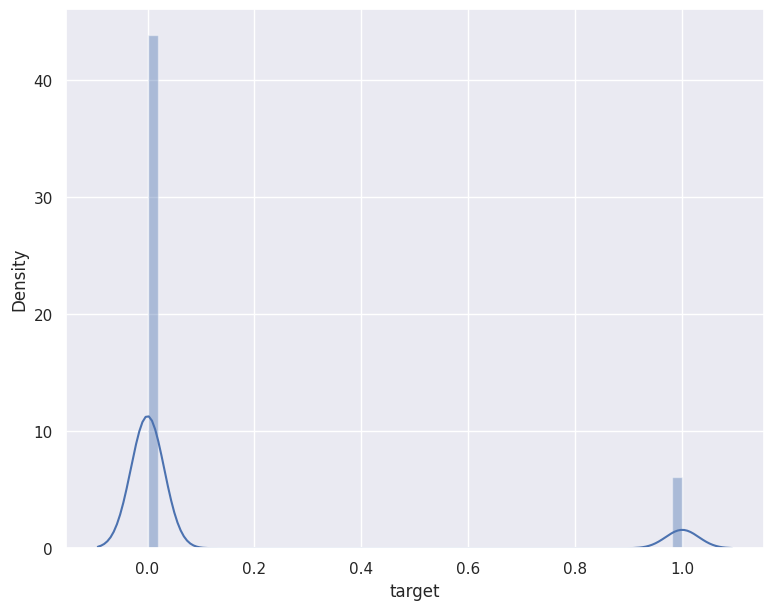

In [9]:
sns.set(rc={'figure.figsize':(9,7)})
sns.distplot(X_train['target']);

### <b><span style='color:#FFCE30'> 3.1 |</span> Explore Variable with Churn</b>
Exploring the relationship between a variable and customer churn can help businesses understand how each variable may impact customer retention and inform targeted strategies.

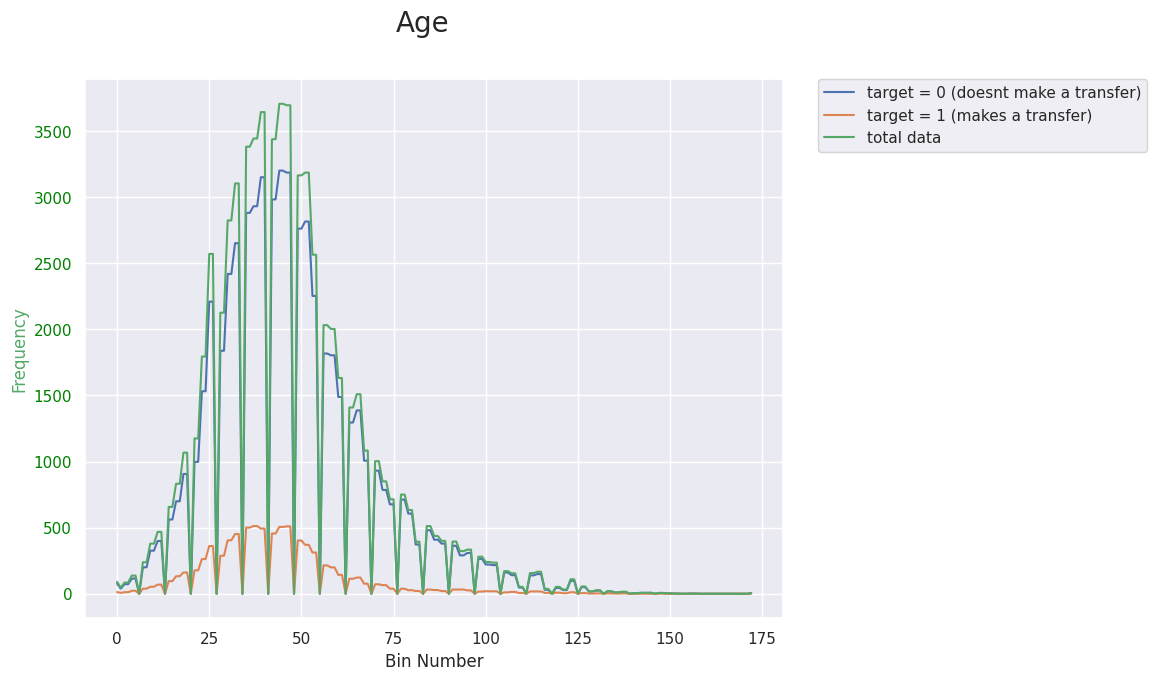

In [10]:
def running_mean(x, N):
   cumsum = np.cumsum(np.insert(x, 0, 0)) 
   return np.concatenate([x[0:N-1], (cumsum[N:] - cumsum[:-N]) / N])

var = 'Age' # feat we are going to analyze
mydf = X_train.copy() # df we are going to analyze

def df_to_bin(var, mydf):
    IQR = mydf[var].quantile([0.75]).values - mydf[var].quantile([0.25]).values # inter-quartile range
    n = 200000 # size of our dataframe
    bin_size = 2.5*IQR/n**(1/3) # Freedman-Diaconis rule to define the bin size
    bin_number = int((mydf[var].max() - mydf[var].min())/bin_size)

    # separate dfs between target == 0 and target == 1
    df_no_transfer = mydf[var][mydf['target'] == 0]
    df_with_transfer = mydf[var][mydf['target'] == 1]

    # get the bin frequency height (H) and the index of that bin (X) for each group
    H0, X0 = np.histogram(df_no_transfer, bins=bin_number)
    H1, X1 = np.histogram(df_with_transfer, bins=bin_number)

    H0 = running_mean(H0, 2)
    H1 = running_mean(H1, 2)
    Hsum = H0 + H1
    
    return bin_size, bin_number, H0, H1, Hsum, X0, X1

var = 'Age'
bin_size, bin_number, H0, H1, Hsum, X0, X1 = df_to_bin(var, mydf)

# plot the result
fig, ax1 = plt.subplots()
ax1.plot(H0, label='target = 0 (doesnt make a transfer)')
ax1.plot(H1, label='target = 1 (makes a transfer)')
ax1.plot(Hsum, label='total data')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig.suptitle(var, fontsize=20)
ax1.set_ylabel('Frequency', color='g', fontsize=12)
ax1.tick_params(axis='y', colors='green')
plt.xlabel('Bin Number', fontsize=12)
plt.show()


**Running Mean Plot for Binned Age Data**

- This code generates a plot to visualize the distribution of the 'Age' feature in a dataset, with a focus on customers who churned ('Exited' = 1) and those who did not ('Exited' = 0). 
- It calculates and displays a running mean for the frequency of age groups within different bins, providing insights into how age might affect customer churn.

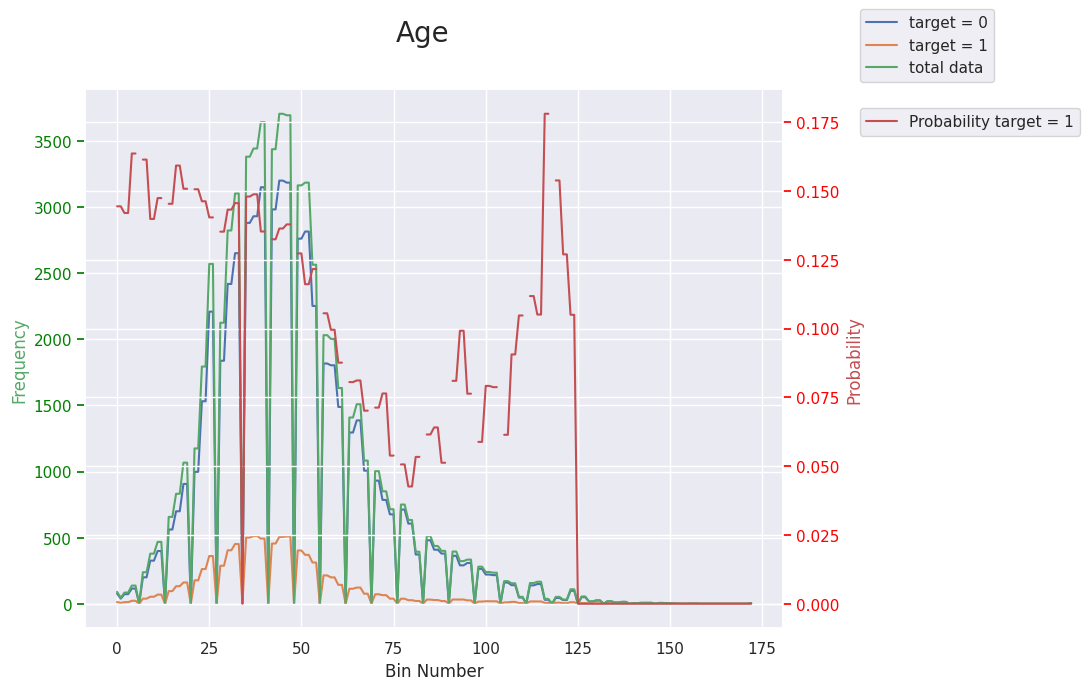

In [11]:
Hmin = 80
def get_probs(bin_number, H1, Hsum, Hmin):
    probs = []
    #finds min_i
    for i in range(bin_number):
        if Hsum[i] > Hmin:
            min_i = i
            break

    #finds max_i
    for i in reversed(range(bin_number)):
        if Hsum[i] > Hmin:
            max_i = i
            break

    #get probabilities to plot
    for i in range(0, bin_number):
        if i < min_i or i > max_i:
            probs.append(0)
        else:
            probs.append(H1[i]/Hsum[i]) 
    
    return probs, min_i, max_i

probs, min_i, max_i = get_probs(bin_number, H1, Hsum, Hmin)

#plot the result
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(H0, label='target = 0')
ax1.plot(H1, label='target = 1')
ax1.plot(Hsum, label='total data')
ax2.plot(probs, 'r', label='Probability target = 1')
ax1.legend(bbox_to_anchor=(1.10, 1), loc=3)
ax2.legend(bbox_to_anchor=(1.10, 0.90), loc=3)
fig.suptitle(var, fontsize=20)
ax1.set_ylabel('Frequency', color='g', fontsize=12)
ax1.tick_params(axis='y', colors='green')
ax2.set_ylabel('Probability', color='r', fontsize=12)
ax2.tick_params(axis='y', colors='red')
ax1.set_xlabel('Bin Number', fontsize=12)
plt.show()

**Probability Plot for Churn Based on Age Bins**
- This code creates a plot that shows the probability of customer churn (target = 1) for various age groups. 
- It uses the Freedman-Diaconis rule to define bins for the 'Age' feature and calculates the probability of churn within each bin. 
- The red line represents these probabilities, while the left y-axis shows the frequency of data points within each bin for both churned and non-churned customers.

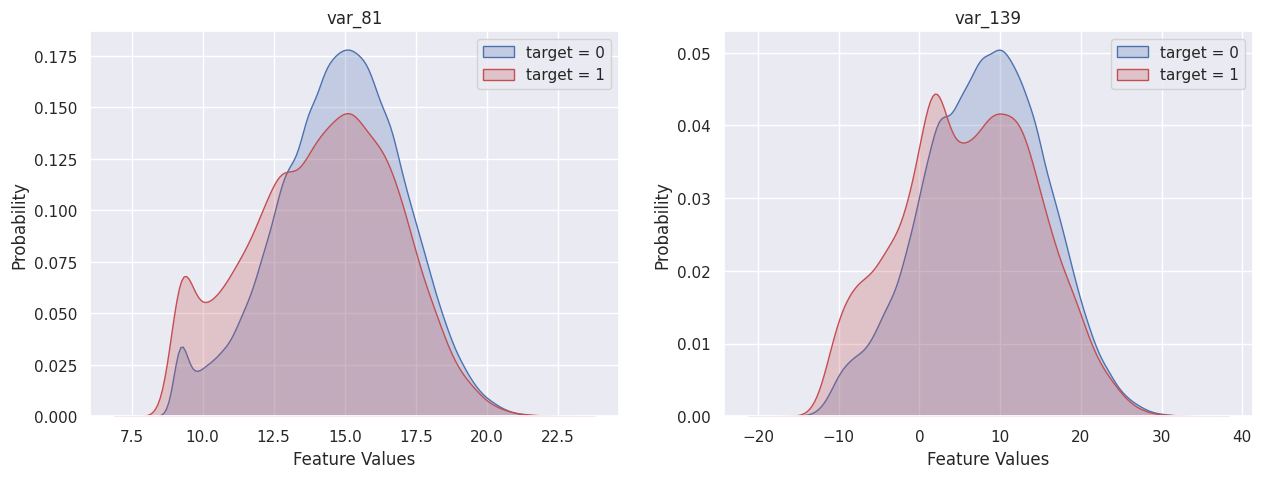

In [12]:
feat1, feat2 = 'var_81', 'var_139'

fig = plt.subplots(figsize=(15, 5))

#plot pdf feat 1
plt.subplot(1, 2, 1)
sns.kdeplot(X_train[feat1][X_train['target'] == 0], shade=True, color="b", label = 'target = 0')
sns.kdeplot(X_train[feat1][X_train['target'] == 1], shade=True, color="r", label = 'target = 1')
plt.title(feat1)
plt.xlabel('Feature Values')
plt.ylabel('Probability')
plt.legend(loc='upper right')  # Adjust legend location

#plot pdf feat 2
plt.subplot(1, 2, 2)
sns.kdeplot(X_train[feat2][X_train['target'] == 0], shade=True, color="b", label = 'target = 0')
sns.kdeplot(X_train[feat2][X_train['target'] == 1], shade=True, color="r", label = 'target = 1')
plt.title(feat2)
plt.xlabel('Feature Values')
plt.ylabel('Probability')
plt.legend(loc='upper right')  # Adjust legend location

plt.show()


### <b><span style='color:#FFCE30'> 3.2 |</span> Probability Density Function</b>
- Our dataset is composed of > 200 features and a target column specifying if a client made a specific type of transaction. 
- Our objective in this competition is, based on the train dataset, predict in the test dataset who will also make a transfer. 
- Let's take a look at the PDF of the features 81 and 139 for values of target = 1 and target = 0. 
- As you can see, there is a great motivation to calculate the PDF difference between target = 0 and target = 1 distributions. 
- They are clearly different, so it would make sense to say that, if pdf(target = 1) - pdf(target = 0) > 0, then there is a high probability of the client making a transfer.



# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>4 |</span></b> <b>ASSEMBLE PIPELINE</b></div>

In [13]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler,RobustScaler,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline

In [14]:
#applies transformers to different columns.
multicolumn_prep = ColumnTransformer([ ('encode', 
                                       OneHotEncoder(handle_unknown='ignore'), 
                                       ['Gender', 'Geography','NumOfProducts','HasCrCard','IsActiveMember']),
                                     ],
                                     remainder='passthrough')
multicolumn_prep

ColumnTransformer(remainder='passthrough',
                  transformers=[('encode',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['Gender', 'Geography', 'NumOfProducts',
                                  'HasCrCard', 'IsActiveMember'])])

In [15]:
class DropColumn(BaseEstimator, TransformerMixin):
    def __init__(self, cols=[]):
        self.cols = cols
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        
        return X.drop(self.cols, axis=1)

In [16]:
class MinMaxScalerForNumeric(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.scaler = MinMaxScaler()

    def fit(self, X, y=None):
        # Select numeric columns
        self.numeric_cols = X.select_dtypes(include=['number']).columns
        # Fit the scaler on the numeric data
        self.scaler.fit(X[self.numeric_cols], y)
        return self

    def transform(self, X, y=None):
        # Transform only the numeric columns and leave others unchanged
        X_copy = X.copy()
        X_copy[self.numeric_cols] = self.scaler.transform(X[self.numeric_cols])
        return X_copy

In [17]:
named_preprocessing_pipeline = Pipeline([
    ('drop', DropColumn(cols=['Surname'])),
    ('scale_numeric', MinMaxScalerForNumeric()),
    ('prep',ColumnTransformer([ ('encode', 
                                 OneHotEncoder(handle_unknown='ignore',sparse_output=False), 
                                 ['Gender', 'Geography','NumOfProducts','HasCrCard','IsActiveMember']),
                              ],
                              remainder='passthrough').set_output(transform='pandas')),
])

named_preprocessing_pipeline         

Pipeline(steps=[('drop', DropColumn(cols=['Surname'])),
                ('scale_numeric', MinMaxScalerForNumeric()),
                ('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encode',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender', 'Geography',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember'])]))])

In [18]:
#checking output on X_train df
df_train = named_preprocessing_pipeline.fit_transform(X_train.drop(['target'], axis=1))
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132027 entries, 28588 to 7816
Columns: 219 entries, encode__Gender_Female to remainder__var_199
dtypes: float64(219)
memory usage: 221.6 MB


In [19]:
#checking output on X_test df
df_test = pd.DataFrame(named_preprocessing_pipeline.transform(X_test))
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33007 entries, 50063 to 157395
Columns: 219 entries, encode__Gender_Female to remainder__var_199
dtypes: float64(219)
memory usage: 55.4 MB


# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>5 |</span></b> <b>MODELLING</b></div>

In [20]:
from sklearn.linear_model import LogisticRegression

# Create a LogRegression
logistic_regression = LogisticRegression(random_state=2024, max_iter=1000)

LR_pipeline = make_pipeline(named_preprocessing_pipeline, logistic_regression)
LR_pipeline

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('drop', DropColumn(cols=['Surname'])),
                                 ('scale_numeric', MinMaxScalerForNumeric()),
                                 ('prep',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('encode',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False),
                                                                   ['Gender',
                                                                    'Geography',
                                                                    'NumOfProducts',
                                                                    'HasCrCard',
                                                                    'IsActiveMember'])]))])),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, random_state=2024))])

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>6 |</span></b> <b>EVALUATION</b></div>

In [21]:
trainX = X_train.drop(['target'], axis=1) 
trainy = X_train['target']

In [22]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, f1_score

# Number of folds
n_splits = 10

# StratifiedKFold
stratkf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Cross-validation results
cv_results = []

# Stratified k-fold cross-validation
for fold, (train_idx, val_idx) in enumerate(stratkf.split(trainX, trainy)):
    X_train_fold, X_val_fold = trainX.iloc[train_idx], trainX.iloc[val_idx]
    y_train_fold, y_val_fold = trainy.iloc[train_idx], trainy.iloc[val_idx]

    # Fit the NB_pipeline on the training fold
    LR_pipeline.fit(X_train_fold, y_train_fold)

    # Predictions on the validation fold
    y_val_pred_prob = LR_pipeline.predict_proba(X_val_fold)[:, 1]  # Assuming binary classification
    y_pred = LR_pipeline.predict(X_val_fold)

    # Calculate ROC AUC score and F1 score
    roc_auc = roc_auc_score(y_val_fold, y_val_pred_prob)
    f1 = f1_score(y_val_fold, y_pred, average='weighted')

    # Print and store the results
    print(f'Fold {fold + 1}, ROC AUC Score on Validation Set: {roc_auc}')
    print(f'Fold {fold + 1}, F1 Score on Validation Set: {f1}')
    print('-' * 70)

    cv_results.append(roc_auc)

# Average cross-validation result
average_cv_result = sum(cv_results) / n_splits
print(f'\nAverage ROC AUC Score across {n_splits} folds: {average_cv_result}')


Fold 1, ROC AUC Score on Validation Set: 0.8730418462343399
Fold 1, F1 Score on Validation Set: 0.8883487806049648
----------------------------------------------------------------------
Fold 2, ROC AUC Score on Validation Set: 0.8696476773606971
Fold 2, F1 Score on Validation Set: 0.8854062976170144
----------------------------------------------------------------------
Fold 3, ROC AUC Score on Validation Set: 0.8655966071048964
Fold 3, F1 Score on Validation Set: 0.8863974446166856
----------------------------------------------------------------------
Fold 4, ROC AUC Score on Validation Set: 0.8649366550971244
Fold 4, F1 Score on Validation Set: 0.8856765337006394
----------------------------------------------------------------------
Fold 5, ROC AUC Score on Validation Set: 0.8662875568276948
Fold 5, F1 Score on Validation Set: 0.8836997511940735
----------------------------------------------------------------------
Fold 6, ROC AUC Score on Validation Set: 0.872087338262724
Fold 6, F1 

### <b><span style='color:#FFCE30'> 6.1 |</span> Evaluation of CV </b>

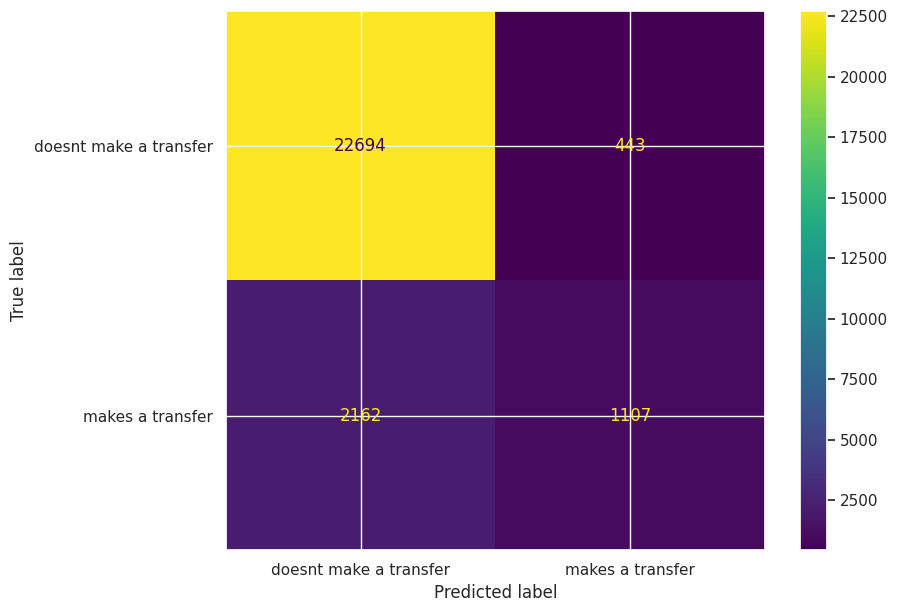

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

X_train, X_val, y_train, y_val = train_test_split(trainX, trainy, test_size=0.2, random_state=42)

LR_pipeline.fit(X_train, y_train)

predictions_LR = LR_pipeline.predict(X_val)

cm_LR = confusion_matrix(y_val, predictions_LR)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_LR, display_labels=['doesnt make a transfer', 'makes a transfer'])
disp.plot()
plt.show()

### <b><span style='color:#FFCE30'> 6.2 |</span> Confusion Matrix </b>


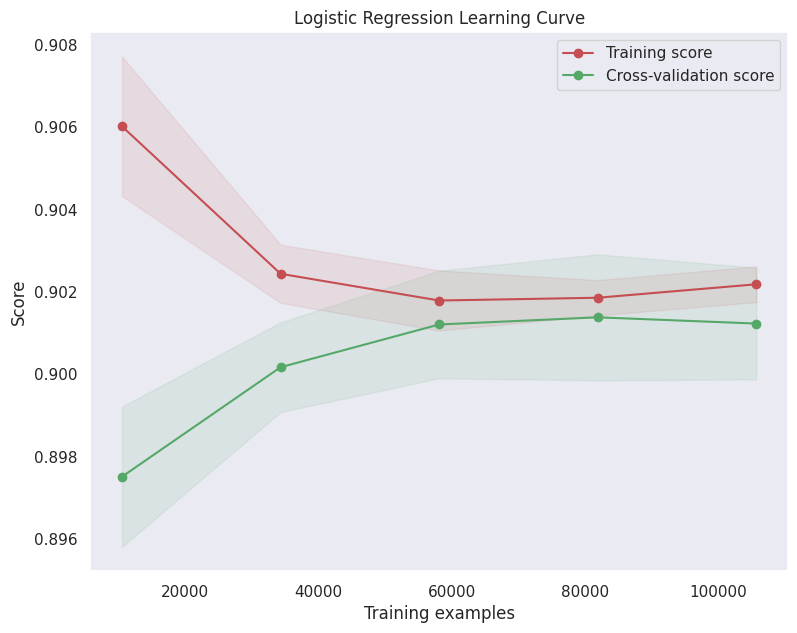

In [24]:
from sklearn.model_selection import StratifiedKFold, learning_curve

# Define the cross-validation method (StratifiedKFold in this example)
stratkf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2024)

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


# Plot the learning curve for your Naive Bayes classifier
g = plot_learning_curve(LR_pipeline, "Logistic Regression Learning Curve", trainX, trainy, cv=stratkf)

plt.show()


### <b><span style='color:#FFCE30'> 6.3 |</span> Learning Curve </b>

The learning curve plot typically consists of two curves: one for the training score and one for the cross-validation (CV) score. 



# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>7 |</span></b> <b>EVALUATION WITH TEST SET</b></div>

In [25]:
LR_pipeline.fit(trainX, trainy)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('drop', DropColumn(cols=['Surname'])),
                                 ('scale_numeric', MinMaxScalerForNumeric()),
                                 ('prep',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('encode',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False),
                                                                   ['Gender',
                                                                    'Geography',
                                                                    'NumOfProducts',
                                                                    'HasCrCard',
                                                                    'IsActiveMember'])]))])),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, random_state=2024))])

In [26]:
testX = X_test.drop(['target'], axis=1) 
testy = X_test['target']

In [27]:
y_pred_proba = LR_pipeline.predict_proba(testX)[:, 1]  # Probability of class 1 (Makes a transfer)

In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Convert predicted probabilities to binary labels using a threshold (e.g., 0.5)
y_pred_binary = (y_pred_proba > 0.5).astype(int)

# Calculate ROC AUC Score
roc_auc = roc_auc_score(testy, y_pred_proba)

# Calculate Precision, Recall, and F1-score
precision = precision_score(testy, y_pred_binary)
recall = recall_score(testy, y_pred_binary)
f1 = f1_score(testy, y_pred_binary)

print(f'ROC AUC Score on Test Set: {roc_auc}')
print(f'Precision on Test Set: {precision}')
print(f'Recall on Test Set: {recall}')
print(f'F1 Score on Test Set: {f1}')

# Use classification report for a comprehensive summary
report = classification_report(testy, y_pred_binary)
print(report)

ROC AUC Score on Test Set: 0.8627138650736295
Precision on Test Set: 0.6746113989637306
Recall on Test Set: 0.32754716981132076
F1 Score on Test Set: 0.4409822184589331
              precision    recall  f1-score   support

           0       0.91      0.98      0.95     29032
           1       0.67      0.33      0.44      3975

    accuracy                           0.90     33007
   macro avg       0.79      0.65      0.69     33007
weighted avg       0.89      0.90      0.88     33007



### <b><span style='color:#FFCE30'> 7.1 |</span> Interpreting the result </b>

